# Graded Lab Assignment 2: Evaluate classifiers (10 points)

Student name: Katja Bouman
 
In this assignment you will optimize and compare the perfomance of a parametric (logistic regression) and non-parametric (k-nearest neighbours) classifier on the MNIST dataset.

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline.  

### Deadline Friday, November 17, 23:59.

This notebook consists of three parts: design, implementation, results & analysis. 
We provide you with the design of the experiment and you have to implement it and analyse the results.

### Criteria used for grading
* Explain and analyse all results.
* Make your notebook easy to read. When you are finished take your time to review it!
* You do not want to repeat the same chunks of code multiply times. If your need to do so, write a function. 
* The implementation part of this assignment needs careful design before you start coding. You could start by writing pseudocode.
* In this exercise the insights are important. Do not hide them somewhere in the comments in the implementation, but put them in the Analysis part
* Take care that all the figures and tables are well labeled and numbered so that you can easily refer to them.
* A plot should have a title and axes labels.
* You may find that not everything is 100% specified in this assignment. That is correct! Like in real life you probably have to make some choices. Motivate your choices.


### Grading points distribution

* Implementation 5 points
* Results and analysis 5 points

## Design of the experiment

You do not have to keep the order of this design and are allowed to alter it if you are confident.
* Import all necessary modules. Try to use as much of the available functions as possible. 
* Use the provided train and test set of MNIST dataset.
* Pre-process data eg. normalize/standardize, reformat, etc.           
  Do whatever you think is necessary and motivate your choices.
* (1) Train logistic regression and k-nn using default settings.
* Use 10-fold cross validation for each classifier to optimize the performance for one parameter: 
    * consult the documentation on how cross validation works in sklearn (important functions:             cross_val_score(), GridSearchCV()).
    * Optimize k for k-nn,
    * for logistic regression focus on the regularization parameter,
* (2) Train logistic regression and k-nn using optimized parameters.
* Show performance on the cross-validation set for (1) and (2) for both classifiers: 
    * report the average cross validation error rates (alternatively, the average accuracies - it's up to you) and standard deviation,
    * plot the average cross valildation errors (or accuracies) for different values of the parameter that you tuned. 
* Compare performance on the test set for two classifiers:
    * produce the classification report for both classifiers, consisting of precision, recall, f1-score. Explain and analyse the results.
    * print confusion matrix for both classifiers and compare whether they missclassify the same  classes. Explain and analyse the results.
* Discuss your results.
* BONUS: only continue with this part if you are confident that your implemention is complete 
    * tune more parameters of logistic regression
    * add additional classifiers (NN, Naive Bayes, decision tree), 
    * analyse additional dataset (ex. Iris dataset)

## Implementation of the experiment

In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
import numpy
from sklearn.datasets import load_digits
from sklearn import svm
from sklearn.model_selection import train_test_split #to split in train and test set
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix


## Important note: 
    I used python 2 ! So some things might go differently if you run my code in python 3 ...

In [42]:
# load mnist dataset 
digits = load_digits()


In [16]:
# split in train and test set
X_train = reshape(digits.images[:1500],(1500,64))
X_test = reshape(digits.images[1500:],(297,64))
y_train = digits.target[:1500]
y_test = digits.target[1500:]

In [17]:
# (1) Train logistic regression and k-nn using default settings

#Pre-process data eg. normalize/standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Logistic Regression
LR = LogisticRegression(max_iter = 200)

#k-nn with default setting n=5
KNN = KNeighborsClassifier()

# Training
# Train both classifiers, uising fit() function.
LR_fitted = LR.fit(X_train, y_train)
KNN_fitted = KNN.fit(X_train, y_train) 


In [18]:
#Use 10-fold cross validation for each classifier to optimize the performance for one parameter

#For the knn finding the optimal k
#Try k 0 to 6
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6]}

#Use the KNN from before with the the default k
#Now use GridSearch to try all 20 k's, cv = 10 because we do 10-fold cross validation
clfK = GridSearchCV(KNN, parameters,cv=10)

#Now optimilize to find the best preforming k
clfK.fit(X_train, y_train)

#Print the best score and the optimal k
print('Best score for training data:', clfK.best_score_) 
print('Best k:',clfK.best_estimator_.n_neighbors) 


#Now for the logistic regression
#Set a range of parameters that you will try
#parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] } this gave optimal = 1.0 so I specified it even more to:
#parameters = {'C': [0.97, 0.98, 0.99, 1.0, 1.1] } this gave optimal = 0.97 so I specified it even more to:
parameters = {'C': [0.92, 0.93, 0.94, 0.95, 0.96, 0.97]}

#Use the LR from before with the default logistic regression with 200 iterations
#Now use GridSearch to try all the parameters
clf = GridSearchCV(LR, parameters, cv=10)

#Now optimilize to find the best preforming parameter
clf.fit(X_train, y_train)

#Print the best score and the optimal k
print('Best score for training data:', clf.best_score_) 
print('Best parameter:',clf.best_estimator_.C) 

('Best score for training data:', 0.9613333333333334)
('Best k:', 3)
('Best score for training data:', 0.944)
('Best parameter:', 0.92)


In [20]:
#So now we will train logistic regression and k-nn using their optimized parameters.
#The optimal value for knn and logistic regression on this data have shown to be 3 and 0.94 repectivly. 

# Logistic Regression
LR_2 = LogisticRegression(C=0.92, max_iter = 200)

#k-nn with default setting n=5
KNN_2 = KNeighborsClassifier(n_neighbors=3)

# Training
# Train both classifiers, uising fit() function.
LR_2_fitted = LR_2.fit(X_train, y_train)
KNN_2_fitted = KNN_2.fit(X_train, y_train) 

In [41]:
# Now show performance on the cross-validation set for (1) and (2) for both classifiers
# report the average cross validation error rates and standard deviation

#Classifiers is a list of the different classifiers
Classifiers = [LR, KNN, LR_2, KNN_2]

#accuracy is a list with all the average cross validation error rates of the different classifiers
accuracy = []
#stdv is a list with all the standard deviations of the different classifiers
stdv = []

for i in range(len(Classifiers)):
    score = cross_val_score(Classifiers[i], X_train, y_train)
    accuracy.append(score.mean())
    stdv.append(score.std())
    
    
# (1) Default values logistic regression
print"Logistic regression default accuracy and standard deviation:", accuracy[0], stdv[0], "\n"
# (1) Default values KNN
print "Knn default accuracy and standard deviation:", accuracy[1], stdv[1], "\n"
# (2) Optimal values logistic regression
print "Logistic regression optimal accuracy and standard deviation:", accuracy[2], stdv[2], "\n"
# (2) Optimal values KNN
print "Knn optimal accuracy and standard deviation:", accuracy[3], stdv[3], "\n"

Logistic regression default accuracy and standard deviation: 0.924023894863 0.0159971232403 

Knn default accuracy and standard deviation: 0.928701655573 0.0237358774393 

Logistic regression optimal accuracy and standard deviation: 0.923357228196 0.0169163244827 

Knn optimal accuracy and standard deviation: 0.93675499232 0.0179780612783 



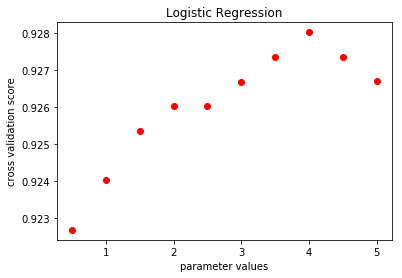

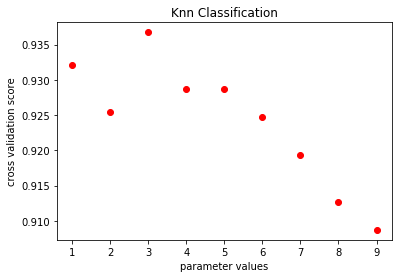

In [46]:
#plot the average cross valildation errors (or accuracies) for different values of the parameter that you tuned.
#So not just the optimal parameter, but also other values to compare the difference in preformance

parameter_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
cv_values = []
for i in range(len(parameter_values)):
    LR_3 = LogisticRegression(C=parameter_values[i], max_iter = 200)
    cv_score_3 = cross_val_score(LR_3, X_train, y_train)
    cv_values.append(mean(cv_score_3))
    i += 1

    
k_values = [1, 2, 3, 4, 5, 6, 7, 8 ,9]
cvk_values = []
for i in range(len(k_values)):
    KNN_3 = KNeighborsClassifier(n_neighbors=k_values[i])
    cv_score_4 = cross_val_score(KNN_3, X_train, y_train)
    cvk_values.append(np.mean(cv_score_4))
    i += 1
    
plt.figure(1)
plt.title('Logistic Regression')
plt.ylabel('cross validation score')
plt.xlabel('parameter values')
plt.plot(parameter_values, cv_values, 'ro')


plt.figure(2)
plt.ylabel('cross validation score')
plt.xlabel('parameter values')
plt.plot(k_values, cvk_values, 'ro')
plt.title('Knn Classification')


In [54]:
# Compare performance on the test set for two classifiers
# Use the function classification_report() from the sklearn metrics library 
#true values:

# For the optimized logistic regression:
# true values are:
# y_test
# predicted values are:
# LR_2.predict(X_test)

print "Logistic regression optimal classification report:", "\n"
print(classification_report(y_test, LR_2.predict(X_test)))

# For the optimized knn:
# true values are:
# y_test
# predicted values are:
# KNN_2.predict(X_test)

print "Knn optimal classification report:", "\n"
print(classification_report(y_test, KNN_2.predict(X_test)))


Logistic regression optimal classification report: 

             precision    recall  f1-score   support

          0       0.96      0.93      0.94        27
          1       0.90      0.87      0.89        31
          2       0.96      0.96      0.96        27
          3       0.77      0.67      0.71        30
          4       0.97      0.91      0.94        33
          5       0.88      1.00      0.94        30
          6       0.94      1.00      0.97        30
          7       0.88      0.93      0.90        30
          8       0.78      0.89      0.83        28
          9       0.89      0.77      0.83        31

avg / total       0.89      0.89      0.89       297

Knn optimal classification report: 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.94      1.00      0.97        31
          2       0.89      0.89      0.89        27
          3       0.92      0.80      0.86        30
     

In [56]:
# print confusion matrix for both classifiers and compare whether they missclassify the same classes. 

# For the optimized logistic regression:
# true values are:
# y_test
# predicted values are:
# LR_2.predict(X_test)
print("Confusion matrix of optimal Logistic regression:")
print(" ")
print(confusion_matrix(y_test, LR_2.predict(X_test)))
print(" ")

# For the optimized knn:
# true values are:
# y_test
# predicted values are:
# KNN_2.predict(X_test)
print("Confusion matrix of optimal Knn:")
print(" ")
print(confusion_matrix(y_test, KNN_2.predict(X_test)))

Confusion matrix of optimal Logistic regression:
 
[[25  0  0  0  0  0  2  0  0  0]
 [ 0 27  0  2  0  0  0  0  2  0]
 [ 0  0 26  1  0  0  0  0  0  0]
 [ 0  1  1 20  0  2  0  3  3  0]
 [ 0  0  0  0 30  0  0  0  0  3]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  1  0  0 28  1  0]
 [ 0  2  0  1  0  0  0  0 25  0]
 [ 1  0  0  2  0  2  0  1  1 24]]
 
Confusion matrix of optimal Knn:
 
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  3  0  0  0]
 [ 0  0  2 24  0  1  0  1  1  1]
 [ 0  1  0  0 28  0  0  1  1  2]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  1  0  0  0  0 29  0  0]
 [ 0  1  0  1  0  0  0  0 25  1]
 [ 0  0  0  1  0  2  0  1  0 27]]


## Results and analysis of the experiment

### Classification report

    The classification report shows for each class (in our data digits) of the data the precision, recall and f-score of the classifier. The precicion shows for every digit that is predicted as true for a certain class, how many of these digits is actually classified correctly. The formula of precicion is: tp / (tp + fp), where tp means true positive and fp means false positive. So a low precision rate indicates a high false positive rate, which is very undesirable.
    Recall identifies how many of the digits that actually belong to a certain class, are also classified true for that class. The formula is: tp/(tp + fn), where fn means false negative. In this case the number of false negative casses has influence on the rate. 
    F-score is the harmonic mean of the precision and the recall, with the complex formula: F-score = 2 * (PR / (P + R)). Where P stands for precision and R for recall. 
        For most real-life machine learning applications, a false positive is really bad. In for example the research that classified whether ex-verdict could return to the society. A false positive would result in the ex-verdict to return to society and again commit a crime. Thus the main goal for a classifier is to maximize true positive and minimize false positive.
         However in my classification reports the scores of the precision and recall rates are the same for each specific classifier. You can however compare the two classifiers with each other and conclude that the k-nearest neighbour classifier has higher scores in all of the cases and thus has less false positives and less false negative.   
            You can also investigate the behaviour of the classifiers per class. For the logistic regression classifier you can see that it preformed the worst on digit 3. For this digit both precision and recall were relatively low. The Knn classifier preformed worst on digit 2. 
         For both classifiers, Digit 4 is interesting because for the precision was excellent (at least for knn), but the recall was low. Which means that there were no false positive (it identified zero numbers wrongly as 4's), but quite some false negative (the classifier did not identify all 4's as 4's) And for digit 5 it was the other way around. This is also very clearly visible in the confusion matrixes which I will discuss next. 
    

### Confusion matrix
    
    The confussion matrix is closely related with the classification report, however the martix gives a better insight in how the classifier classified every digit and thus gives a good view on where it went wrong. The rows represent the actual values of the digits and the columns represent the predicted value of the digits. So for example, the linear regression classifier identified 25 zero's correctly as zeros, but also falsly classified 2 zeros as 6's. The model also shows us that both classifies missclassified 3 multiple times and for a ranging number of different digits, where in contrast the logistic regression classifier missclassified for example 4 only for a 9.
        
        We can now use our findings from the classification report to further analyse the matrix and use these two to get a better view of our classifiers. First of all, we can see that as was also clear from the report, for logistic regression 3 has been often classified as an other digit than 3 and Knn was most often mistaken by 4. We can now also identify that 4 was most mistaken by a 9, by both classifiers, and 9 is multiple times falsly classifies as an 3 or a 5, also by both classifiers. 
        
        The fact that our classifiers have difficulty with the same number could be an indication of a lack of those numbers in our training set. Our classifiers would then by overfitting the trainingset such that they are not preforming well on digits that are less presented in the used trainingset. The results from the confusion matrix could thus help to update our trainingset or regelize our model, to improve the preformance. 
        
        Overall the k-nearest neigbourhood classifier preformed better than the Logistic Regression classifier. 
